In [142]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [143]:
people_adj_matrices = np.load("all_participants_3d_adj_matrix.npy")
people_adj_matrices.shape

(70, 116, 116)

In [166]:
number_of_people = people_adj_matrices.shape[0]

In [146]:
#-- 1 to 50 : Depressed people
#-- 51 to 70 : Healthy people

In [147]:
len(people_adj_matrices)

70

In [241]:
brain_networks = []
average_degrees = np.empty(number_of_people)
diameter = np.empty(number_of_people)
average_path_length = np.empty(number_of_people)
average_clustering_coefficients = np.empty(number_of_people)
degrees = []
for i in range(number_of_people):
  G = nx.from_numpy_array(people_adj_matrices[i])
  brain_networks.append(G)
  degrees.append([v for _,v in G.degree()])
  average_degrees[i] = np.mean(degrees[i])
  diameter[i] = nx.diameter(G)
  average_path_length[i] = nx.average_shortest_path_length(G)
  average_clustering_coefficients[i] = nx.average_clustering(G)

In [242]:
people_index = np.arange(0,number_of_people)

groups = np.concatenate((np.ones(50),np.zeros(20)))

In [244]:
brain_df = pd.DataFrame(people_index, columns=['Index'])
brain_df['Group'] = groups
brain_df['Average Degree'] = average_degrees
brain_df['Average Shortest Path Length'] = average_path_length
brain_df['Average Clustering Coefficient'] = average_clustering_coefficients
brain_df['Network Diameter'] = diameter

In [245]:
brain_df

,Index,Group,Average Degree,Average Shortest Path Length,Average Clustering Coefficient,Network Diameter
0,0,1.0,18.258621,1.892054,0.221661,3.0
1,1,1.0,16.258621,1.965667,0.226179,3.0
2,2,1.0,16.465517,1.961169,0.221064,3.0
3,3,1.0,17.172414,1.935232,0.225179,3.0
4,4,1.0,17.586207,1.907946,0.214765,3.0
...,...,...,...,...,...,...
65,65,0.0,17.396552,1.920540,0.201395,3.0
66,66,0.0,17.137931,1.931784,0.217319,3.0
67,67,0.0,17.500000,1.921139,0.218931,3.0
68,68,0.0,17.637931,1.914843,0.212091,3.0


# Degree Distributions

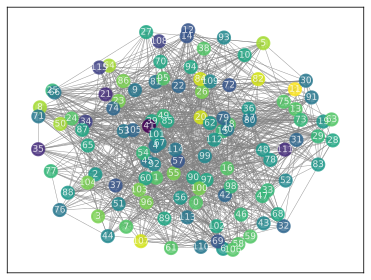

In [249]:
options = {
      "node_size": 150,
      "node_color": [v for _,v in G.degree()],
      "font_color": 'white',
      "font_size": 9,
      "edge_color": "gray",
      "cmap": "viridis",
      # "with_labels": False,
      # "vmin":vmin,
      # "vmax":vmax,
      "alpha":0.8,
      "width":0.5
  }
pos=nx.spring_layout(G, k = 0.5)

nx.draw_networkx(brain_networks[2], pos, **options, linewidths=2)

In [251]:
def degreeDistribution(G):

  degree_sequence = [d for n,d in G.degree()]
  
  plt.figure(figsize=(15, 5))

  # Linear binning
  plt.subplot(1, 3, 1)
  plt.hist(degree_sequence, bins=20, edgecolor='black')
  plt.title('Linear Binning')
  plt.xlabel('Degree')
  plt.ylabel('Frequency')

  # Log scale Linear binning
  plt.subplot(1, 3, 2)
  plt.title('Log-Log Scale (Linear Binning)')
  bin_edges = np.arange(start=np.floor(np.min(degree_sequence)),
                      stop=np.ceil(np.max(degree_sequence)) + 10,
                      step=10)

  bin_indices = np.digitize(degree_sequence, bins=bin_edges)

  bin_counts = np.bincount(bin_indices)[1:]

  mid_points = bin_edges[:-1] + 5  # Midpoint of each bin assuming bin size of 10

  plt.scatter(mid_points, bin_counts, color='blue', alpha=0.6)

  plt.xscale('log')
  plt.yscale('log')

  plt.xlabel('Midpoint of Bin')
  plt.ylabel('Frequency')
  plt.grid(True, which="both", ls="--", linewidth=0.5)

  # Log scale log binning
  plt.subplot(1, 3, 3)

  plt.title('Log-Log Scale (Logarithmic Binning)')
  max_log = np.log10(np.max(degree_sequence))
  bin_edges = np.logspace(start=0, stop=max_log, num=20, base=10)

  hist, edges = np.histogram(degree_sequence, bins=bin_edges)

  mid_points = np.sqrt(edges[:-1] * edges[1:])

  plt.scatter(mid_points, hist, color='blue', alpha=0.6)

  plt.xscale('log')
  plt.yscale('log')
  plt.xlabel('Midpoint of Bin (Log Scale)')
  plt.ylabel('Frequency')
  plt.grid(True, which="both", ls="--", linewidth=0.5)
  
  plt.show()

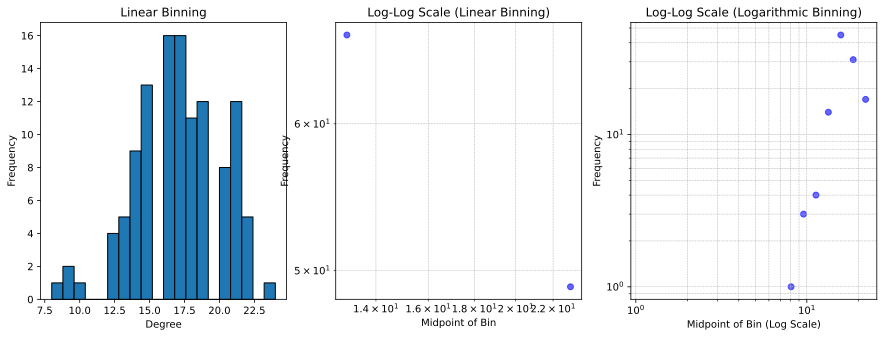

In [257]:
degreeDistribution(brain_networks[5])